<a href="https://colab.research.google.com/github/segnig/Tanzania-Tourism-Prediction/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
FILE_PATH = "/content/drive/MyDrive/Data Science/Tanzania Tourism Prediction/"

# Import Libraries


*   `pandas` for data manipulation.
*   `numpy` for mathematics.
*   `matplotlib.pyplot` and `seaborn`  for data visualization.




In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# ignore warning
import warnings
warnings.filterwarnings("ignore")

# File Path


In [6]:
TRAIN_FILE_PATH = FILE_PATH + "Train.csv"
TEST_FILE_PATH = FILE_PATH + "Test.csv"

## Load Data

Load data to DataFrame

In [7]:
train_df = pd.read_csv(TRAIN_FILE_PATH)
test_df = pd.read_csv(TEST_FILE_PATH)

**Shape of train data**

In [9]:
print("Length of train dataset:", train_df.shape)

Length of train dataset: (4809, 23)


In [10]:
train_df.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


**Dataframe informations**

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [12]:
# Cardinality of the features across data
cardinality = train_df.nunique().sort_values(ascending=False)

# cardinality two
cardinality_2 = (cardinality[cardinality.values == 2].index).to_list()
cardinality_2

['package_insurance',
 'first_trip_tz',
 'package_food',
 'package_guided_tour',
 'package_sightseeing',
 'package_transport_tz',
 'package_transport_int',
 'tour_arrangement',
 'package_accomodation']

In [14]:
# Data values for feature which have two cardinality
train_df[cardinality_2].head()

,package_insurance,first_trip_tz,package_food,package_guided_tour,package_sightseeing,package_transport_tz,package_transport_int,tour_arrangement,package_accomodation
0,No,No,No,No,No,No,No,Independent,No
1,No,Yes,No,No,No,No,No,Independent,No
2,No,No,No,No,No,No,No,Independent,No
3,No,Yes,Yes,Yes,Yes,Yes,No,Package Tour,Yes
4,No,Yes,No,No,No,No,No,Independent,No


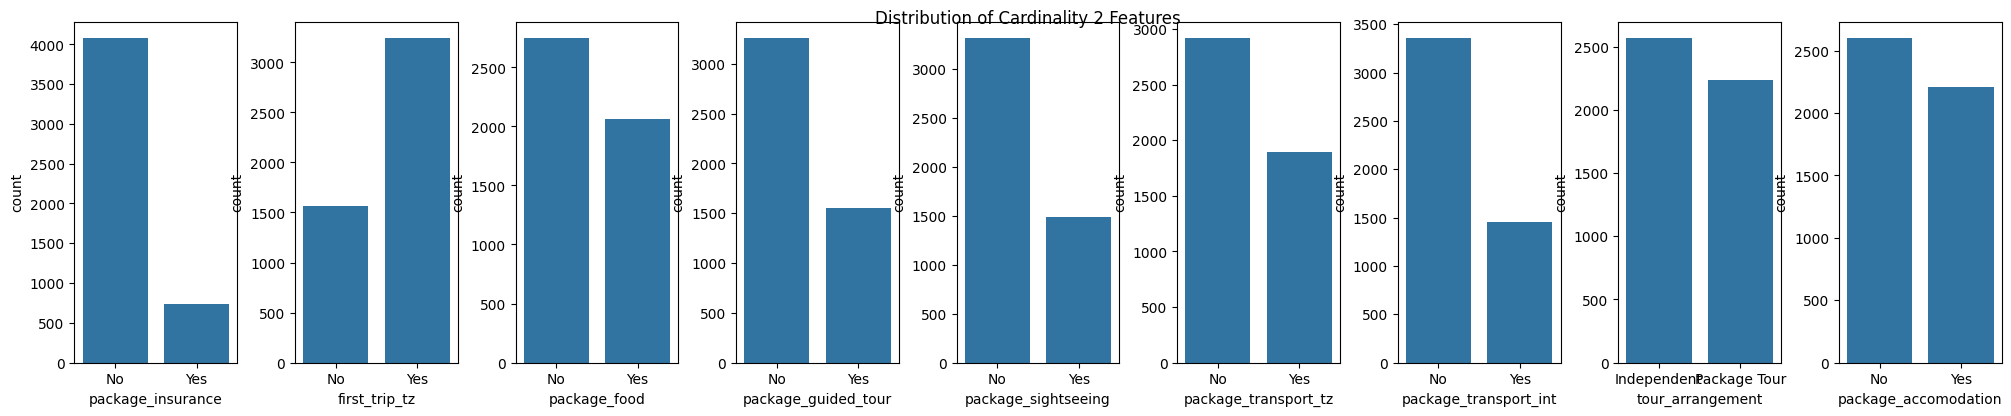

In [ ]:
# plot distribution for cardinality_2 features
fig, ax = plt.subplots(1, len(cardinality_2))
fig.set_size_inches(20, 4)
fig.tight_layout()
fig.suptitle("Distribution of Cardinality 2 Features")

for i in range(len(cardinality_2)):
    sns.countplot(x=cardinality_2[i], data=train_df, ax=ax[i])

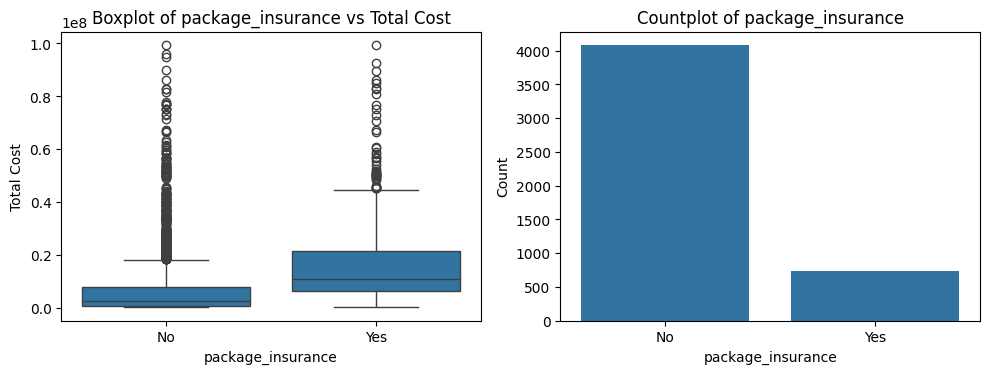

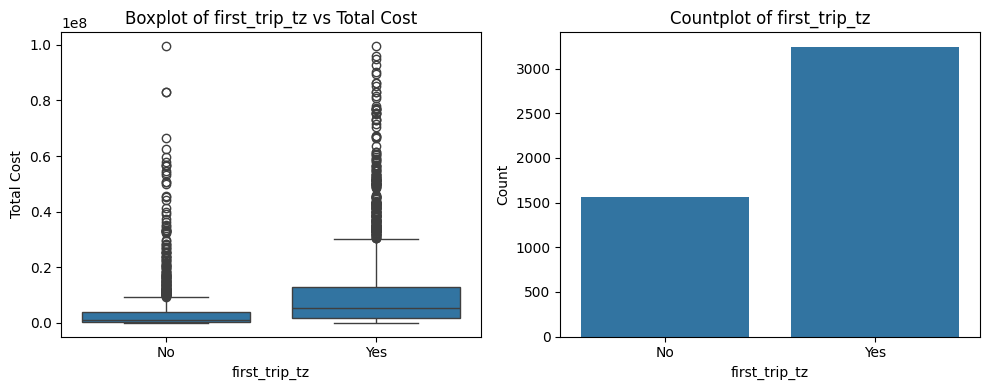

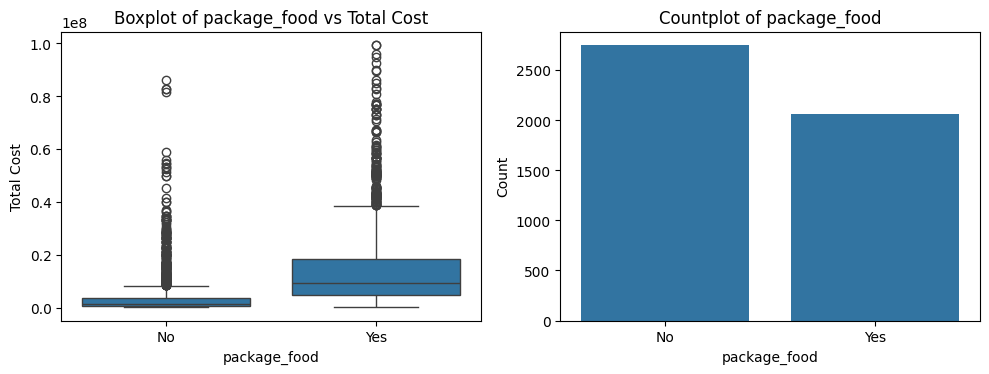

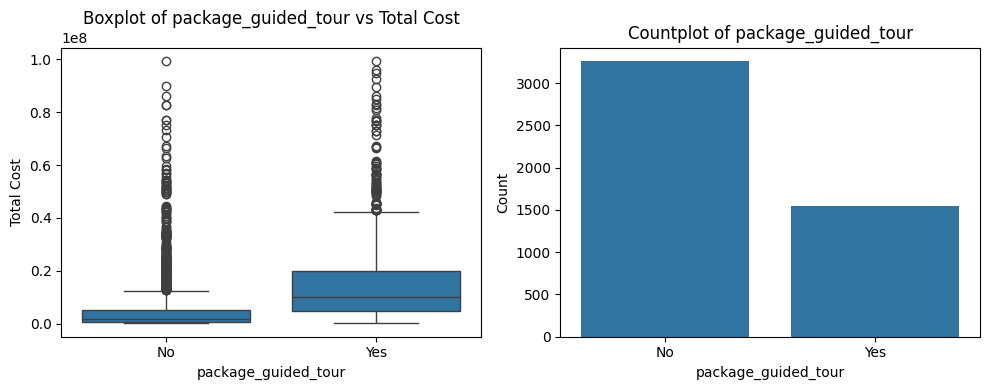

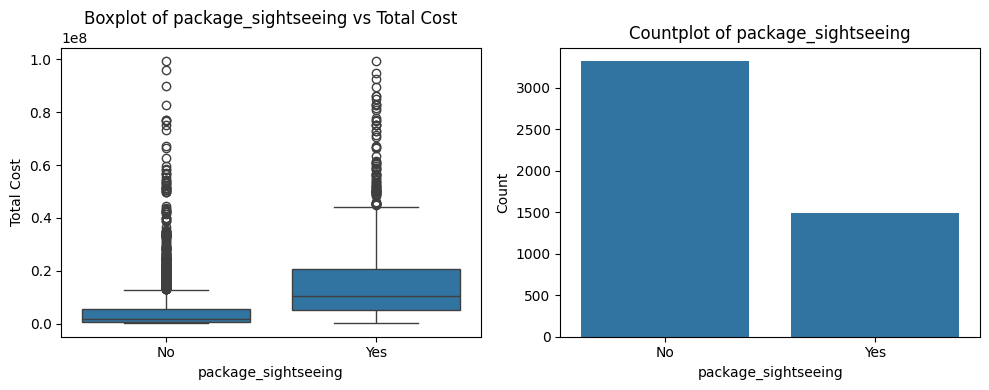

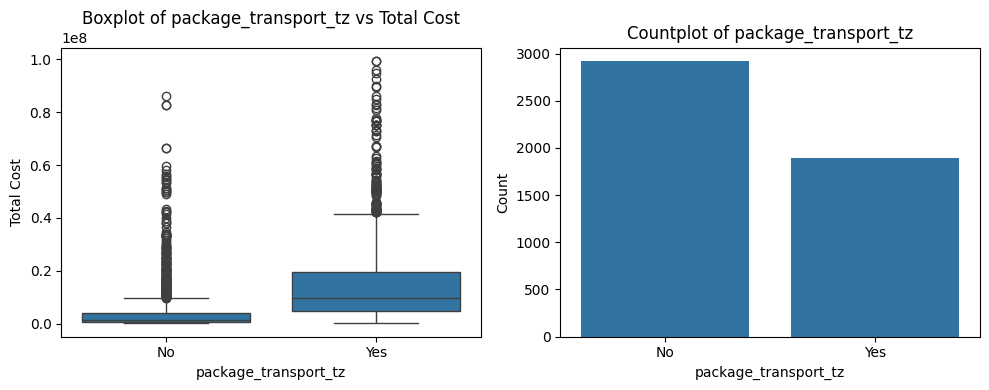

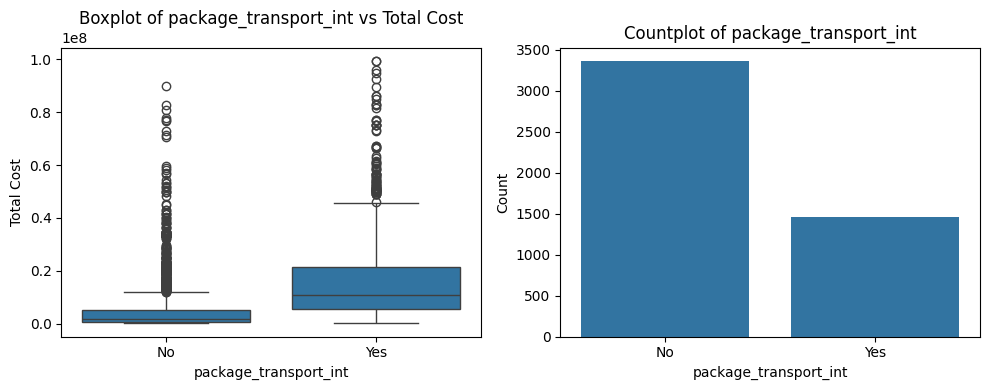

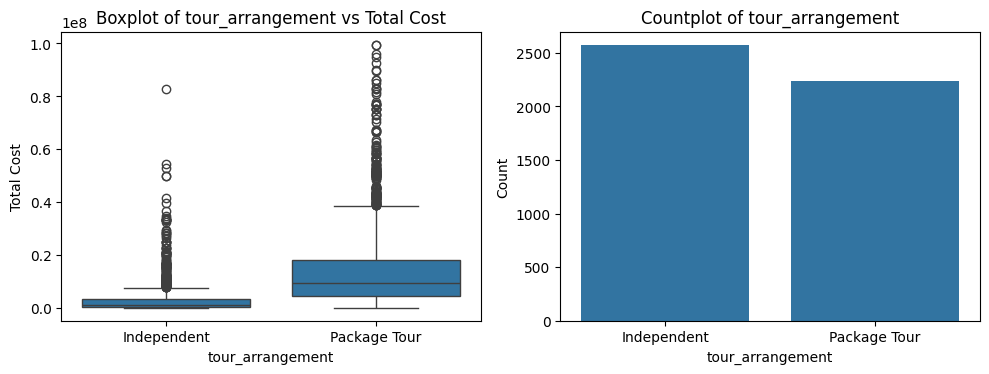

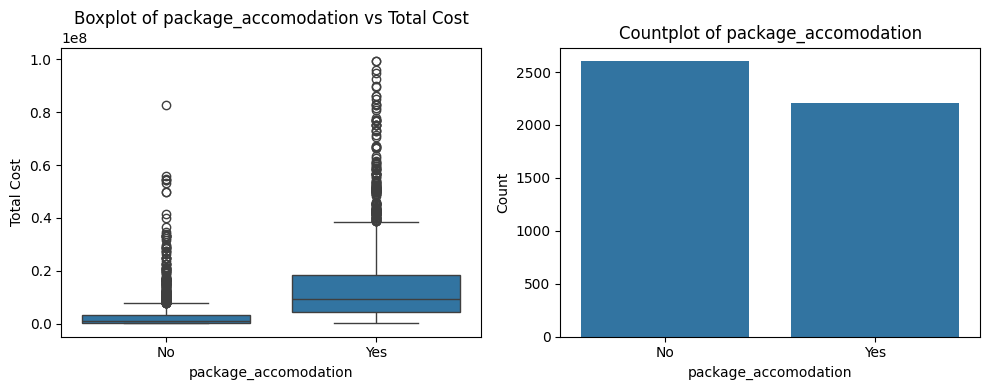

In [ ]:
# Box plot of two cardinal feature

import matplotlib.pyplot as plt
import seaborn as sns

for col in cardinality_2:
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))  # Adjust figure size
    sns.boxplot(x=col, y="total_cost", data=train_df, ax=ax[0])
    ax[0].set_title(f'Boxplot of {col} vs Total Cost')
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('Total Cost')

    sns.countplot(x=col, data=train_df, ax=ax[1])
    ax[1].set_title(f'Countplot of {col}')
    ax[1].set_xlabel(col)
    ax[1].set_ylabel('Count')

    plt.tight_layout()  # Adjust layout
    plt.show()


In [ ]:
# contries name to conversational country name
country_name_mapping = {
    "SWIZERLAND": "SWITZERLAND",
    "UAE": "United Arab Emirates",
    "YEMEN": "YEMEN",
    "CONGO": "Republic of the Congo",
    "BURGARIA": "BULGARIA",
    "DRC": "Democratic Republic of the Congo",
    "KOREA": "South Korea",
    "SWAZILAND": "Eswatini",
    "CZECH REPUBLIC": "Czechia",
    "RUSSIA": "Russia",
    "TURKEY": "Türkiye",
    "TRINIDAD TOBACCO": "Trinidad and Tobago",
    "IRAN": "Iran",
    "SLOVAKIA": "Slovakia",
    "CAPE VERDE": "Cabo Verde",
    "COSTARICA": "Costa Rica",
    "PHILIPINES": "Philippines",
    "IVORY COAST": "Côte d'Ivoire",
    "MORROCO": "Morocco"
}

train_df["country"] = train_df["country"].replace(country_name_mapping)


In [ ]:
for col in cardinality_2:
    print(f"{col}: {train_df[col].unique()}")

package_insurance: ['No' 'Yes']
first_trip_tz: ['No' 'Yes']
package_food: ['No' 'Yes']
package_guided_tour: ['No' 'Yes']
package_sightseeing: ['No' 'Yes']
package_transport_tz: ['No' 'Yes']
package_transport_int: ['No' 'Yes']
tour_arrangement: ['Independent' 'Package Tour']
package_accomodation: ['No' 'Yes']


In [ ]:
for col in cardinality_2:
    fig = px.box(train_df,
             x=col,
             y="total_cost",
             points="all",
             color=col,
             )
    fig.update_layout(
        title=f"Boxplot of {col} vs Total Cost",
        xaxis_title=col,
        yaxis_title="Total Cost",
    )
    fig.show()

In [ ]:
package_features = [col for col in train_df.columns if col.startswith("package_")]
package_features

['package_transport_int',
 'package_accomodation',
 'package_food',
 'package_transport_tz',
 'package_sightseeing',
 'package_guided_tour',
 'package_insurance']

In [ ]:
train_df_copy = train_df.copy()

In [ ]:
# Replace value of `Yes` by 1 and `No` by 0
train_df_copy[package_features] = train_df_copy[package_features].map(lambda x: 1 if x == "Yes" else 0)

In [ ]:
train_df_copy[package_features].head()

,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,1,1,1,1,1,0
4,0,0,0,0,0,0,0


In [ ]:
# `Number_of_packages` sum of packages
train_df_copy["Number_of_Packages"] = train_df_copy[package_features].sum(axis=1)

In [ ]:
train_df_copy["Number_of_Packages"].value_counts()

,count
Number_of_Packages,
0,2545
5,669
6,496
4,429
7,357
3,241
2,49
1,23


<Axes: xlabel='Number_of_Packages'>

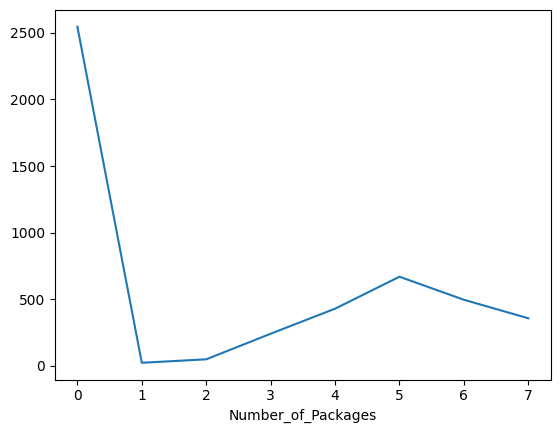

In [ ]:
train_df_copy["Number_of_Packages"].value_counts().sort_index().plot()

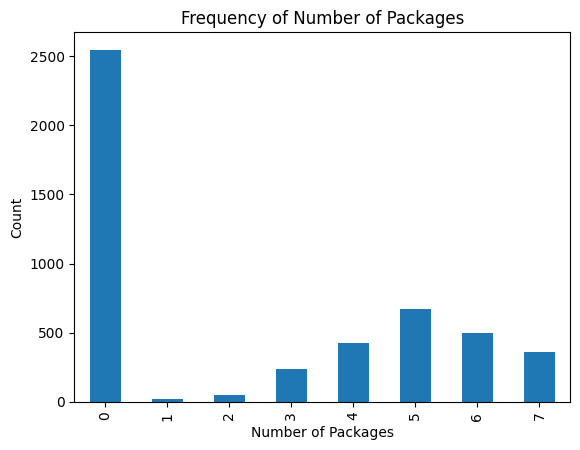

In [ ]:
# Frequeny of number of packages in data
train_df_copy["Number_of_Packages"].value_counts().sort_index().plot(kind="bar")
plt.title("Frequency of Number of Packages")
plt.xlabel("Number of Packages")
plt.ylabel("Count")
plt.show()

In [ ]:
age_group = train_df_copy["age_group"].unique()
age_group.sort()


fig = px.box(
    train_df_copy,
    color="Number_of_Packages",
    y="total_cost",
    x="age_group",
    category_orders={
        "Number_of_Packages": range(8),
        "age_group": age_group
                     },  # Specify the order
)

fig.update_layout(
    title="Boxplot of Total Cost by Number of Packages",
    xaxis_title="Age Group",
    yaxis_title="Total Cost",
)

fig.show()

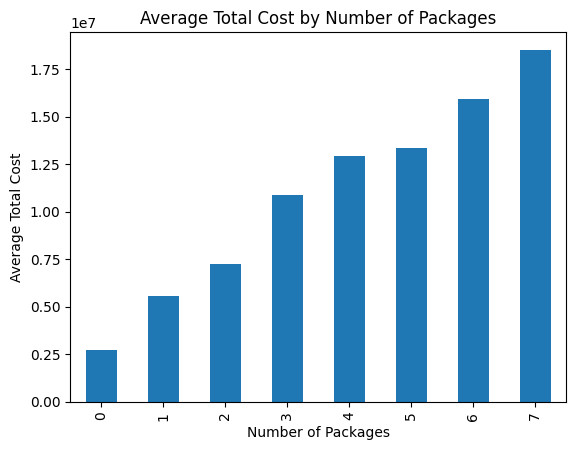

In [ ]:
# Distribution plot of numbers packages vs total cost mean by group by number of packages
train_df_copy.groupby("Number_of_Packages")["total_cost"].mean().plot(kind="bar")
plt.title("Average Total Cost by Number of Packages")
plt.xlabel("Number of Packages")
plt.ylabel("Average Total Cost")
plt.show()

In [ ]:
# Correlation between Number of packages and total cost

for col in package_features:
    print(f"{col}: {train_df_copy[col].corr(train_df_copy['total_cost'])}")

print(f'Number of packages: {train_df_copy["Number_of_Packages"].corr(train_df_copy["total_cost"])}')

package_transport_int: 0.42836224818040475
package_accomodation: 0.4633805748069376
package_food: 0.4354542498106208
package_transport_tz: 0.43437682162608604
package_sightseeing: 0.39405637128409615
package_guided_tour: 0.3730915671933562
package_insurance: 0.27269614455444874
Number of packages: 0.48969928290391956


# Age Group

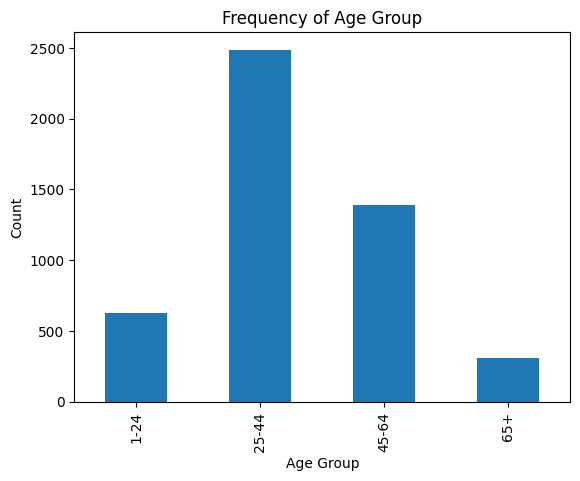

In [ ]:
# Barchart plot `age_group`
train_df["age_group"].value_counts().sort_index().plot(kind="bar")
plt.title("Frequency of Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

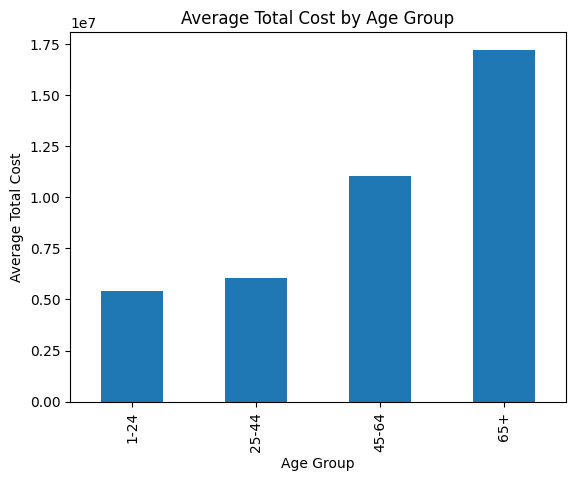

In [ ]:
# group by age group and plot mean of total cost
train_df.groupby("age_group")["total_cost"].mean().plot(kind="bar")
plt.title("Average Total Cost by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Total Cost")
plt.show()

In [ ]:
# boxplot on the age group

fig = px.box(train_df,
             x="age_group",
             y="total_cost",
             points="all",
             color="age_group",
             )
fig.update_layout(
    title="Boxplot of Total Cost by Age Group",
    xaxis_title="Age Group",
    yaxis_title="Total Cost",
)
fig.show()

# Country vs Total cost


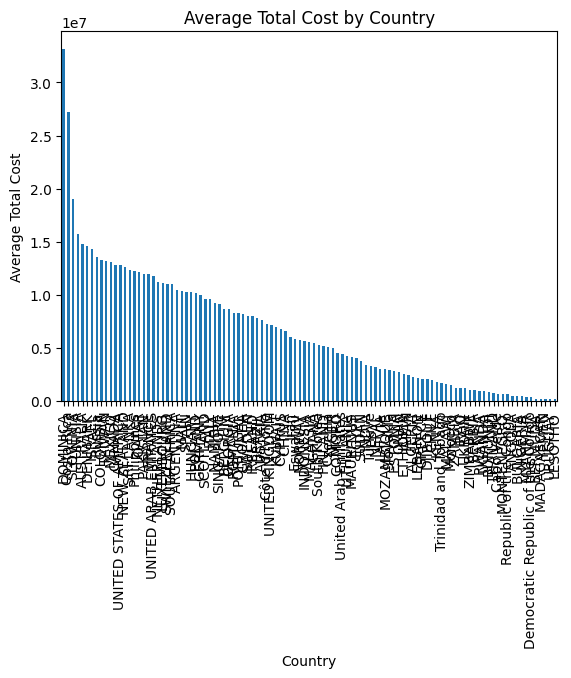

In [ ]:
train_df.groupby("country")["total_cost"].mean().sort_values(ascending=False).plot(kind="bar")
plt.title("Average Total Cost by Country")
plt.xlabel("Country")
plt.ylabel("Average Total Cost")
plt.show()

In [ ]:
category_A_countries = set()
category_B_countries = set()
category_C_countries = set()

category_countries = [
    "Category A: High income.txt",
    "Category B: Upper middle income.txt",
    "Category C: Low and lower middle income.txt",
]

for category in category_countries:
    with open(FILE_PATH + category, "r") as f:
        for line in f:
            country = line.strip()
            if country != "Unknown":
                if category == "Category A: High income.txt":
                    category_A_countries.add(country)
                elif category == "Category B: Upper middle income.txt":
                    category_B_countries.add(country)
                elif category == "Category C: Low and lower middle income.txt":
                    category_C_countries.add(country)

In [ ]:
print(f"Category A countries: {len(category_A_countries)}")
print(f"Category B countries: {len(category_B_countries)}")
print(f"Category C countries: {len(category_C_countries)}")

Category A countries: 72
Category B countries: 49
Category C countries: 69


In [ ]:
! pip install pycountry

In [ ]:
import pycountry

def country_to_iso3(country_name):
    try:
        country = pycountry.countries.search_fuzzy(country_name)[0]
        return country.alpha_3
    except LookupError:
        return "Unknown"


train_df['iso3'] = train_df_copy['country'].apply(country_to_iso3)


In [ ]:
# based which caterogy country exist group them

def categorize_country(country):
    if country in category_A_countries:
        return "Category A"
    elif country in category_B_countries:
        return "Category B"
    elif country in category_C_countries:
        return "Category C"
    else:
        return "Unknown"

train_df_copy["country_category"] = train_df["iso3"].apply(categorize_country)

In [ ]:
train_df_copy["country_category"].value_counts()

,count
country_category,
Category A,3226
Category C,1137
Category B,368
Unknown,78


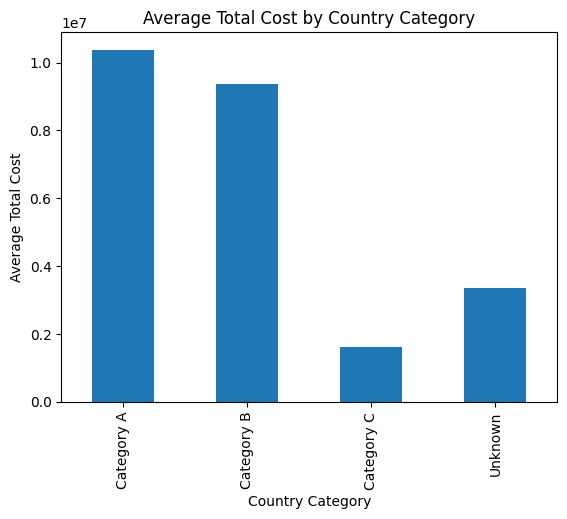

In [ ]:
train_df_copy.groupby("country_category")["total_cost"].mean().plot(kind="bar")
plt.title("Average Total Cost by Country Category")
plt.xlabel("Country Category")
plt.ylabel("Average Total Cost")
plt.show()

In [ ]:
# distribution total cost vs country category
fig = px.box(train_df_copy,
             x="country_category",
             y="total_cost",
             color="Number_of_Packages"

             )
fig.update_layout(
    title="Boxplot of Total Cost by Country Category",
    xaxis_title="Country Category",
    yaxis_title="Total Cost",
)
fig.show()

In [ ]:
# total people

train_df_copy["total_people"] = train_df_copy["total_male"] + train_df_copy["total_female"]


In [ ]:
(train_df_copy["total_people"] * train_df_copy["Number_of_Packages"]).corr(train_df_copy["total_cost"])

0.5127594042295345

In [ ]:
train_df_copy[package_features] = train_df_copy[package_features].multiply(train_df_copy["total_people"], axis=0)

In [ ]:
train_df_copy[package_features].tail()

,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance
4804,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4805,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4806,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4807,2.0,2.0,2.0,0.0,0.0,0.0,0.0
4808,2.0,2.0,2.0,2.0,2.0,2.0,0.0


In [ ]:
train_df_copy["total_package_cost"] = train_df_copy[package_features].sum(axis=1)

In [ ]:
train_df_copy["total_package_cost"].corr(train_df_copy["total_cost"])

0.5081991033506811

In [ ]:
train_df_copy["total_cost_per_person"] = train_df_copy["total_cost"] / train_df_copy["total_people"]

In [ ]:
train_df_copy[["total_cost", "total_cost_per_person"]]

,total_cost,total_cost_per_person
0,674602.5,337301.25
1,3214906.5,3214906.50
2,3315000.0,3315000.00
3,7790250.0,3895125.00
4,1657500.0,1657500.00
...,...,...
4804,3315000.0,3315000.00
4805,10690875.0,5345437.50
4806,2246636.7,2246636.70
4807,1160250.0,580125.00


Text(0, 0.5, 'Total Cost Per Person')

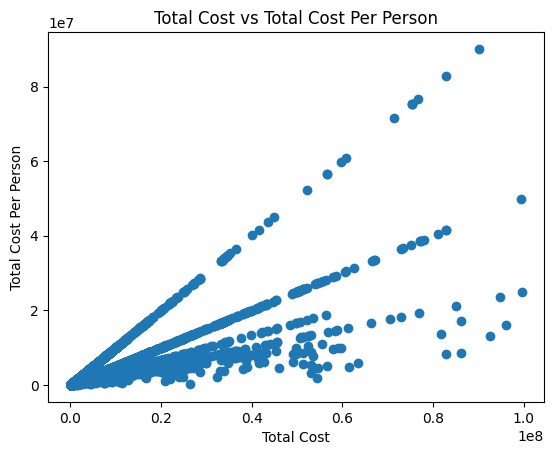

In [ ]:
# scatter plot between total cost and total cost per person
plt.scatter(train_df_copy["total_cost"], train_df_copy["total_cost_per_person"])
plt.title("Total Cost vs Total Cost Per Person")
plt.xlabel("Total Cost")
plt.ylabel("Total Cost Per Person")

In [ ]:
train_df_copy["total_cost_per_person_per_package"] = train_df_copy["total_cost_per_person"] / train_df_copy["Number_of_Packages"]

# Based on Economic Level of countries

In [ ]:
# divide based economy level country
category_A_countries_df = train_df_copy[train_df_copy["country_category"] == "Category A"]
category_B_countries_df = train_df_copy[train_df_copy["country_category"] == "Category B"]
category_C_countries_df = train_df_copy[train_df_copy["country_category"] == "Category C"]
category_unknown_countries_df = train_df_copy[train_df_copy["country_category"] == "Unknown"]

In [ ]:
category_A_countries_df["total_package_cost"].corr(category_A_countries_df["total_cost"])

0.487365227669807

In [ ]:
category_B_countries_df["total_package_cost"].corr(category_B_countries_df["total_cost"])

0.28405734873318056

In [ ]:
category_C_countries_df["total_package_cost"].corr(category_C_countries_df["total_cost"])

0.4213189247689218

In [ ]:
category_unknown_countries_df["total_package_cost"].corr(category_unknown_countries_df["total_cost"])

0.35482649789765325

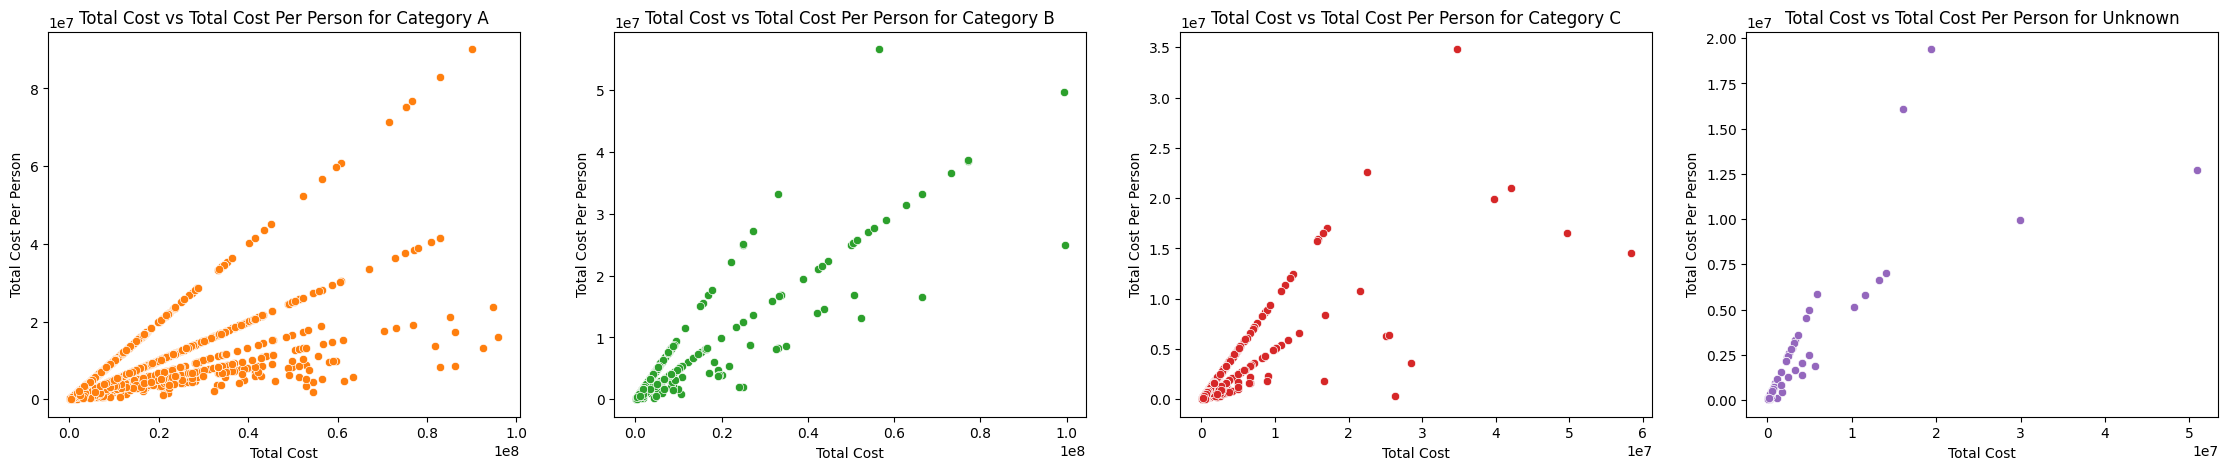

In [ ]:
# scatter plot between total cost and total cost per person for every categorical
fig = plt.subplots(1, 4, figsize=(28, 5))

for i, df in enumerate([category_A_countries_df, category_B_countries_df, category_C_countries_df, category_unknown_countries_df]):
    sns.scatterplot(x="total_cost", y="total_cost_per_person", data=df, ax=fig[1][i], color=f"C{i+1}")
    fig[1][i].set_title(f"Total Cost vs Total Cost Per Person for {df['country_category'].iloc[0]}")
    fig[1][i].set_xlabel("Total Cost")
    fig[1][i].set_ylabel("Total Cost Per Person")

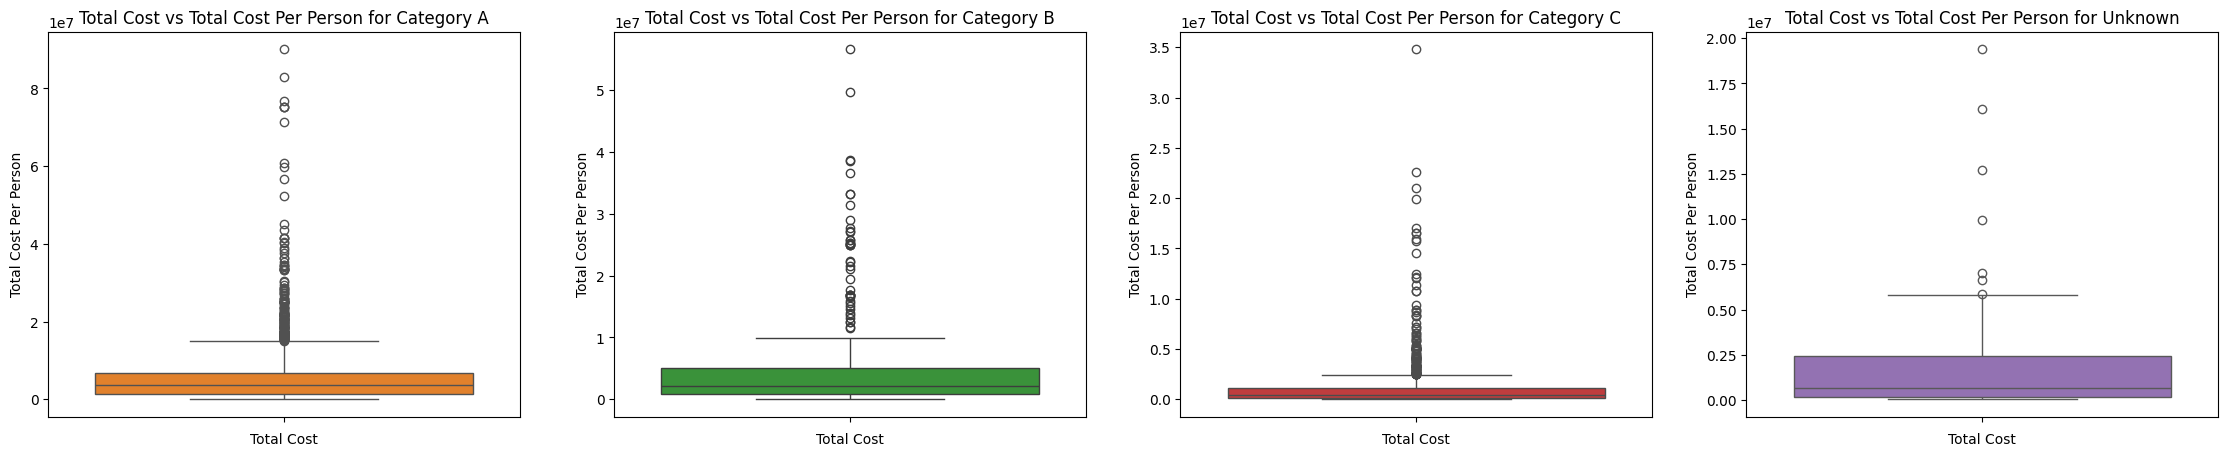

In [ ]:
# box plot between total cost per person for every categorical
fig = plt.subplots(1, 4, figsize=(28, 5))
for i, df in enumerate([category_A_countries_df, category_B_countries_df, category_C_countries_df, category_unknown_countries_df]):
    sns.boxplot(y="total_cost_per_person", data=df, ax=fig[1][i], color=f"C{i+1}")
    fig[1][i].set_title(f"Total Cost vs Total Cost Per Person for {df['country_category'].iloc[0]}")
    fig[1][i].set_xlabel("Total Cost")
    fig[1][i].set_ylabel("Total Cost Per Person")


In [ ]:
"country" in category_unknown_countries_df.columns

True

In [ ]:
category_unknown_countries_df["country"].unique()

array(['YEMEN', 'Republic of the Congo',
       'Democratic Republic of the Congo', 'South Korea', 'Czechia',
       'Russia', 'Iran', 'Slovakia'], dtype=object)

In [ ]:
# box plot between total cost per person for every categorical base total coast of package

for i, df in enumerate([category_A_countries_df, category_B_countries_df, category_C_countries_df, category_unknown_countries_df]):
    fig = px.box(
        df,
        y="total_cost_per_person",
        points="all",
        color="Number_of_Packages"
    )
    fig.update_layout(
        title=f"Boxplot of Total Cost Per Person by Total Package Cost for {df['country_category'].iloc[0]}",
        xaxis_title="Total Package Cost",
        yaxis_title="Total Cost Per Person",
    )
    fig.show()

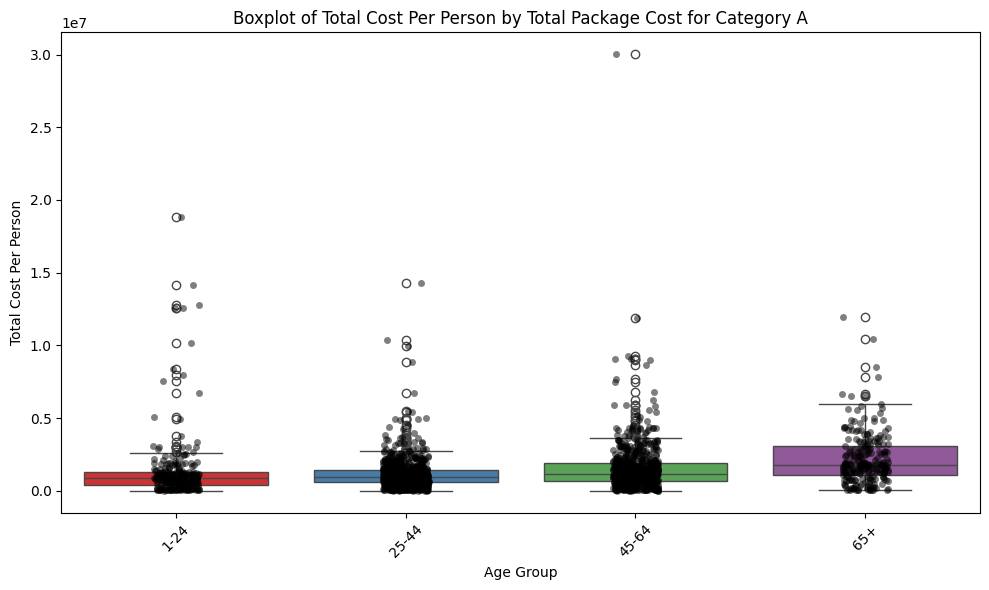

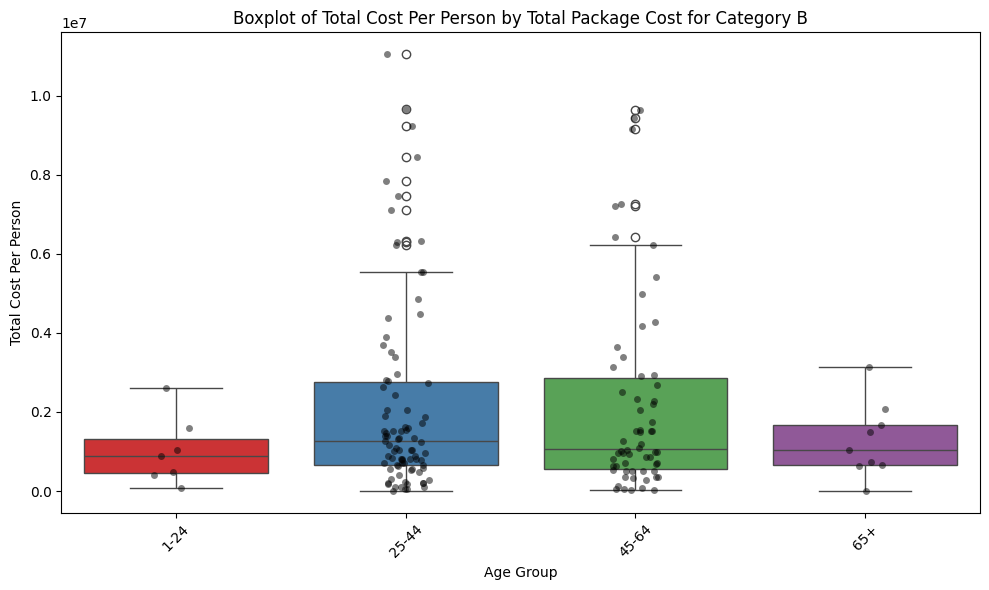

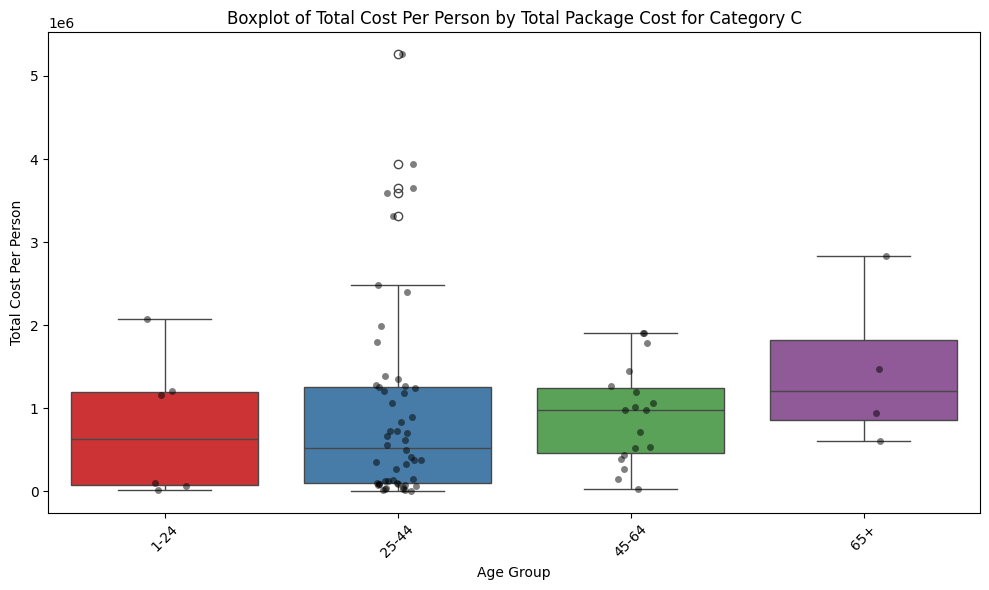

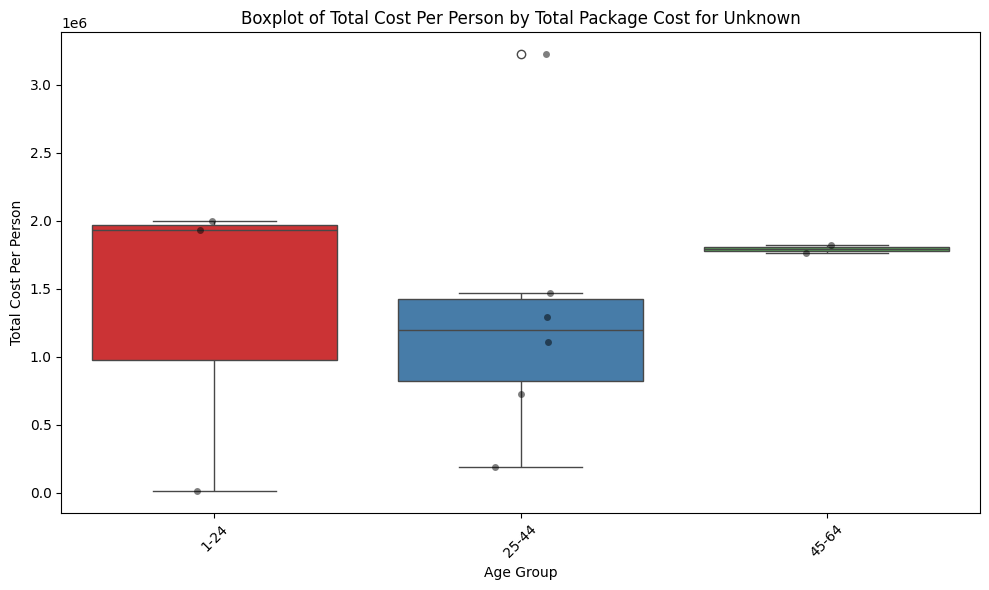

In [ ]:

# List of dataframes
dataframes = [
    category_A_countries_df,
    category_B_countries_df,
    category_C_countries_df,
    category_unknown_countries_df
]

# Iterate through the dataframes
for i, df in enumerate(dataframes):
    df = df.sort_values(by="age_group")

    plt.figure(figsize=(10, 6))

    sns.boxplot(
        data=df,
        x="age_group",
        y="total_cost_per_person_per_package",
        palette="Set1"
    )

    sns.stripplot(
        data=df,
        x="age_group",
        y="total_cost_per_person_per_package",
        color="black",
        alpha=0.5,
        jitter=True
    )


    plt.title(f"Boxplot of Total Cost Per Person by Total Package Cost for {df['country_category'].iloc[0]}")
    plt.xlabel("Age Group")
    plt.ylabel("Total Cost Per Person")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()

    # Show the plot
    plt.show()
